<a href="https://colab.research.google.com/github/Syahru1/PEMMESIN_SEMESTER5/blob/main/2341720002_Muhammad_Syahrul_Gunawan_PEMMESIN_Pertemuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM 1**

**KMEANS**

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Iris.csv to Iris.csv


In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


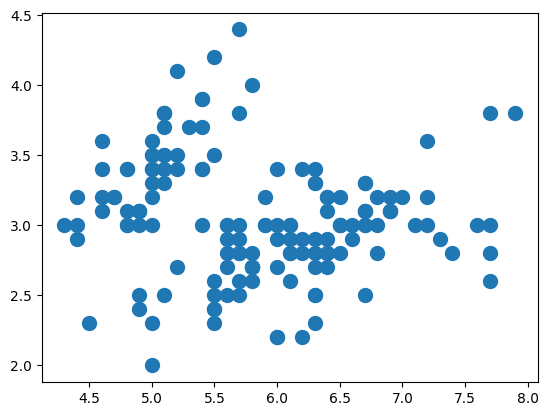

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

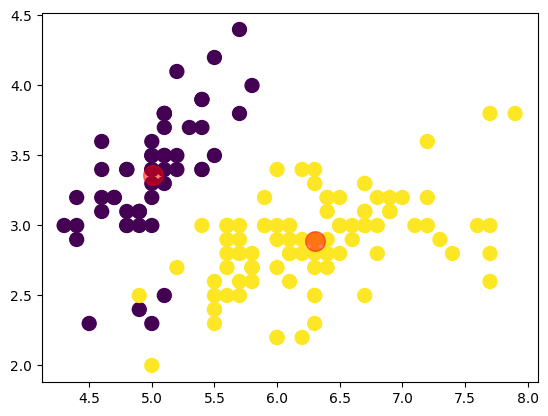

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


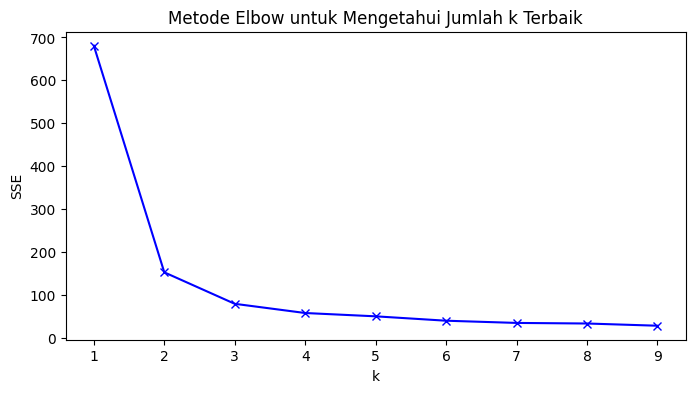

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=49.75040004600874
k=6; SSE=39.51795077185665
k=7; SSE=34.356105897175105
k=8; SSE=33.00707331162129
k=9; SSE=27.840873604465724


**PRAKTIKUM 2**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

**PENGANTAR K-MEANS**

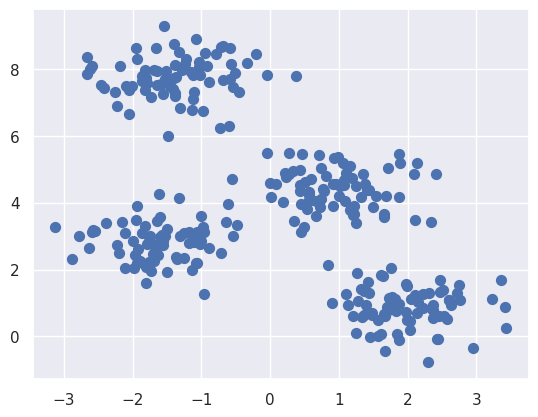

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

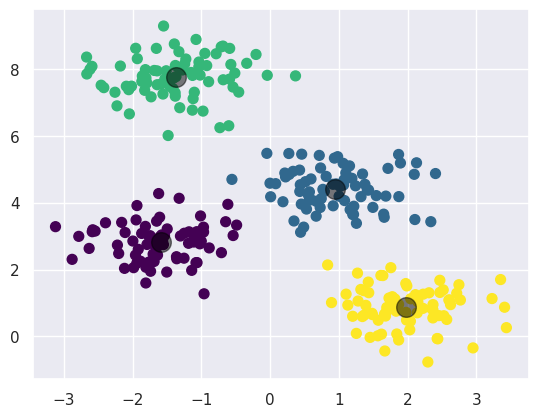

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**ALGORITMA EXPECTATION-MAXIMIZATION**

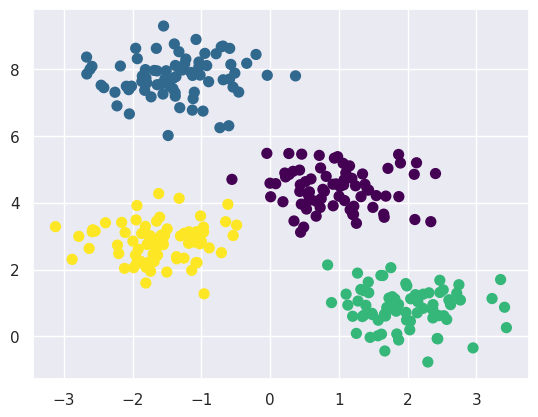

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**PERUBAHAN RANDOM**

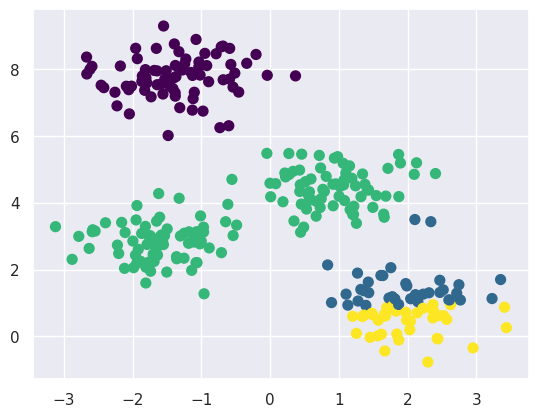

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

**OPTIMASI JUMLAH KLASTER**

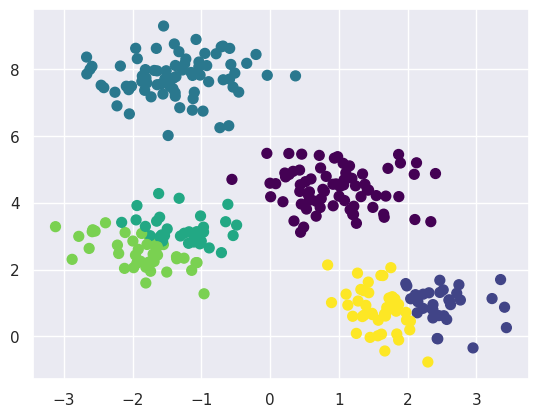

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**BATAS KLASTER YANG TIDAK SELALU LINIER**

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

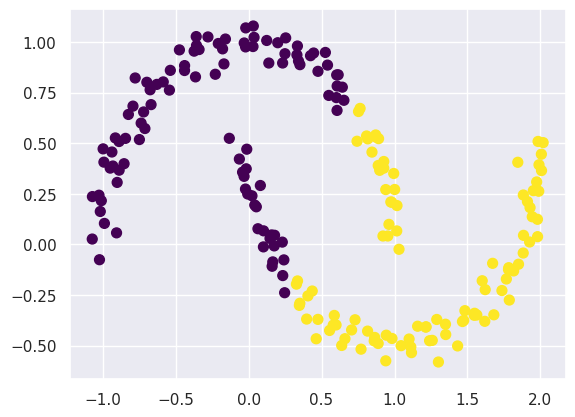

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


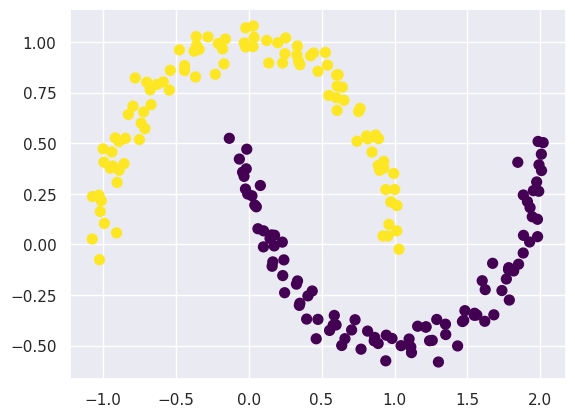

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**CONTOH KASUS 1: KARAKTER ANGKA**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

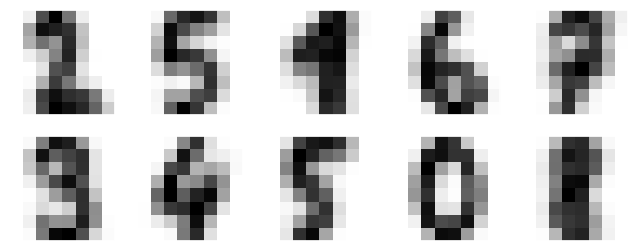

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

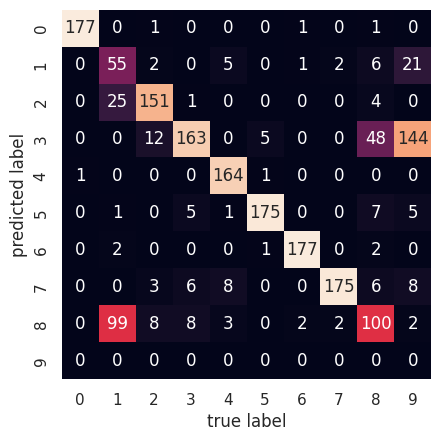

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

**STUDI KASUS 2: KOMPRESI CITRA**

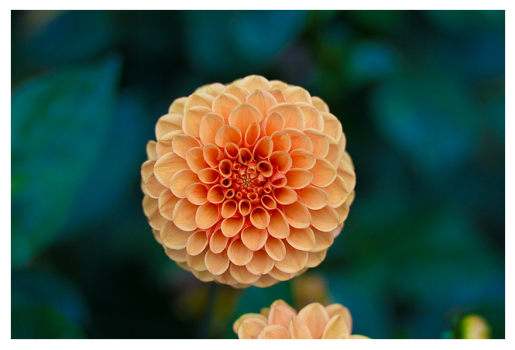

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

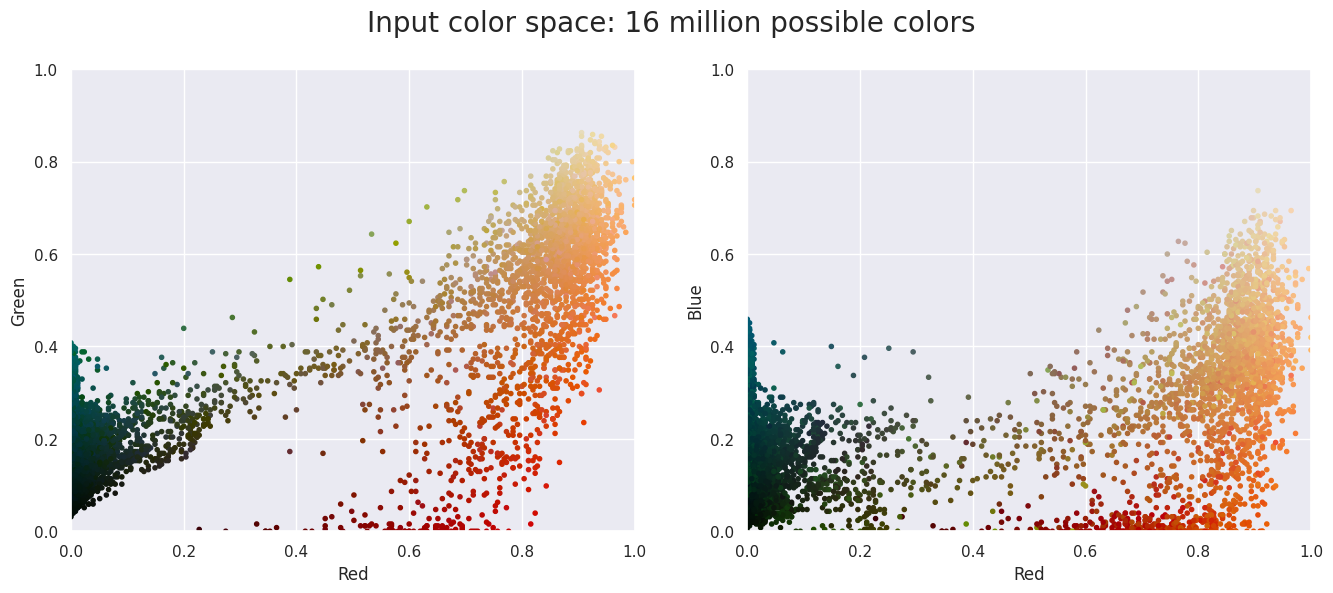

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

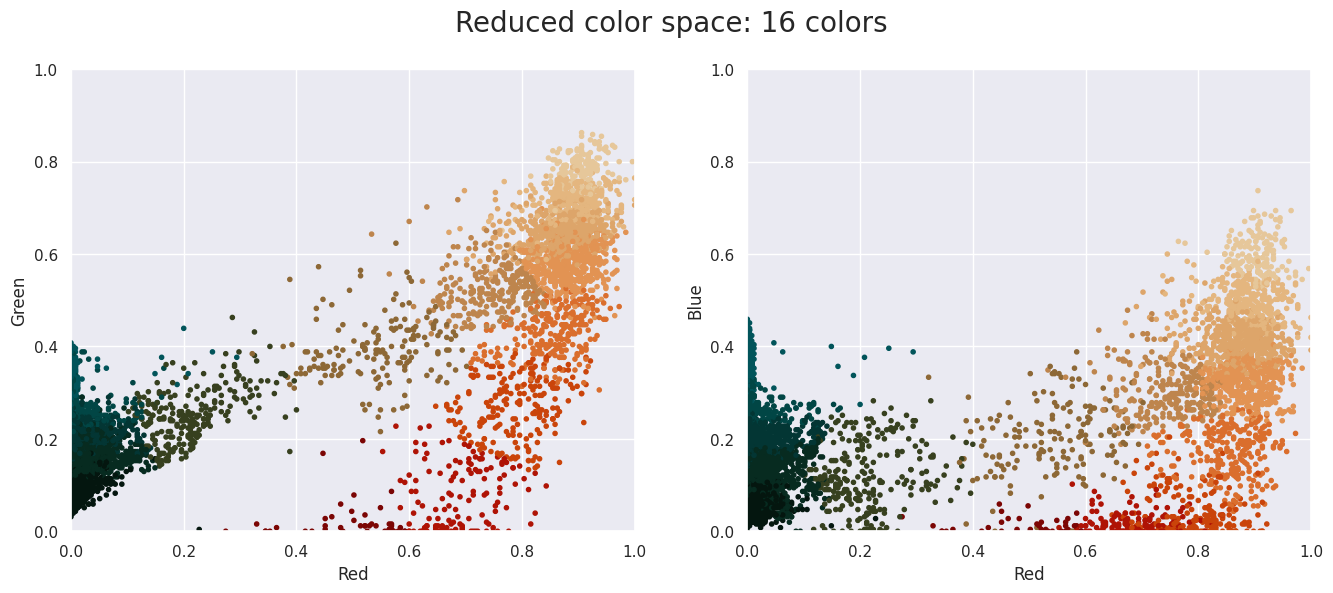

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

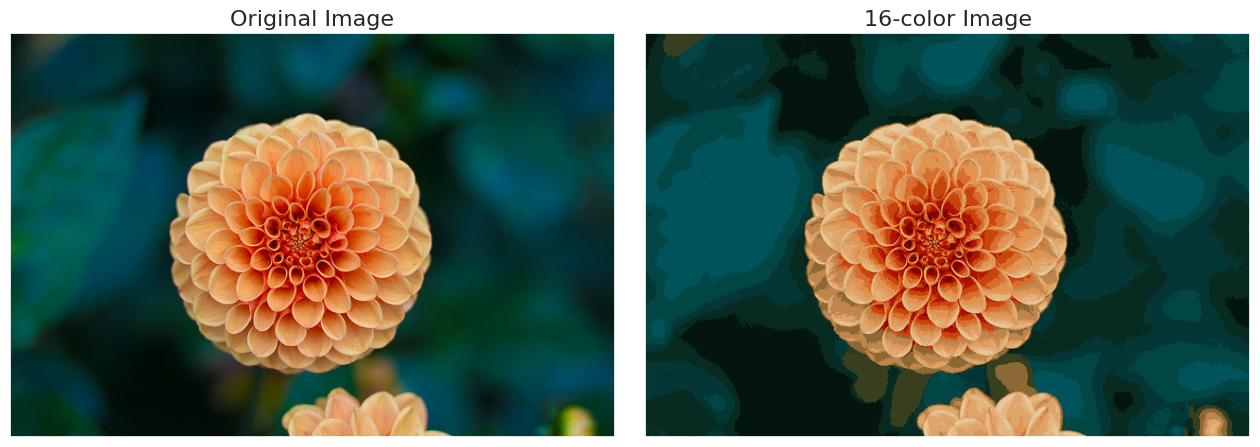

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

**PRAKTIKUM 3**

**PEMBUATAN DATASET SINTETIS**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# Dropdown untuk memilih jumlah data
dropdown = widgets.Dropdown(
    options=[5, 25, 50, 100, "All"],
    value=5,
    description='Tampilkan:',
)

# Fungsi update tampilan
def update_table(change):
    if dropdown.value == "All":
        display(df)
    else:
        display(df.head(dropdown.value))

# Trigger saat dropdown berubah
dropdown.observe(update_table, names='value')

# Tampilkan dropdown
display(dropdown)
update_table(None)


Dropdown(description='Tampilkan:', options=(5, 25, 50, 100, 'All'), value=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


()

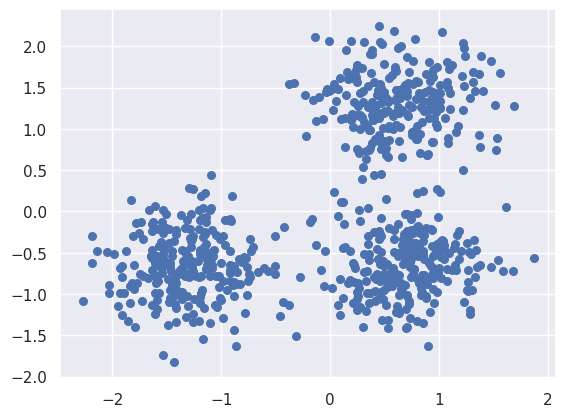

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=30)
()

**COMPUTE DBSCAN**

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


**EVALUASI KUALITAS KLASTERISASI**

In [ ]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information: "
    f"{metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**VISUALISASI HASIL KLASTERISASI**

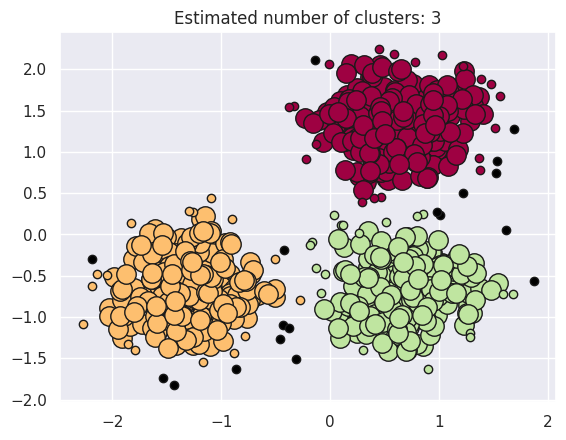

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

**TUGAS PRAKTIKUM**

**1. TUGAS K-MEANS**

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

    Jawab:
    Untuk clustering, fitur yang dibutuhkan adalah fitur numerik yang bisa membedakan pola pelanggan, seperti:
    1. Annual Income (k$)
        - Menggambarkan kemampuan belanja pelanggan.
        - Cocok untuk membedakan pelanggan berpenghasilan rendah, menengah, dan tinggi.

    2. Spending Score (1-100)
        - Menggambarkan tingkat aktivitas belanja pelanggan.
        - Cocok untuk membedakan pelanggan yang suka belanja tinggi dengan rendah, terlepas dari penghasilan.


3. Buatah model K-Means dengan mempertimbangkan jumlah k yang terbaik.


In [ ]:
# Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

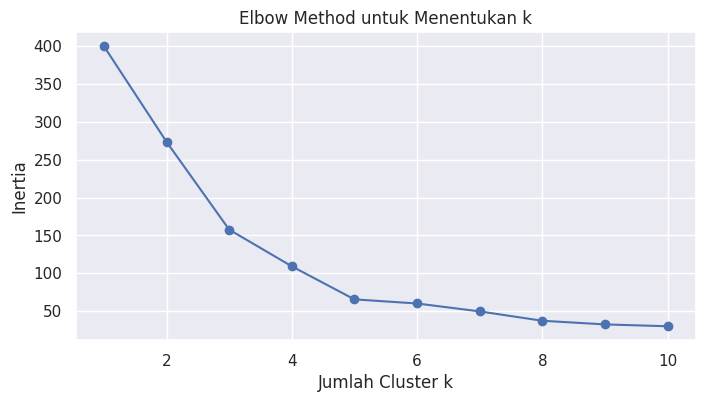

In [ ]:
# Menentukan jumlah cluster 9k) terbaik menggunakan Elbow Method
inertia = []
K_range = range(1, 11)  # Cek k dari 1 sampai 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik Elbow
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster k')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k')
plt.show()

In [ ]:
# Bangun model K-Means dengan k terbaik
# Model K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Tambahkan cluster ke dataframe
df['Cluster'] = labels
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


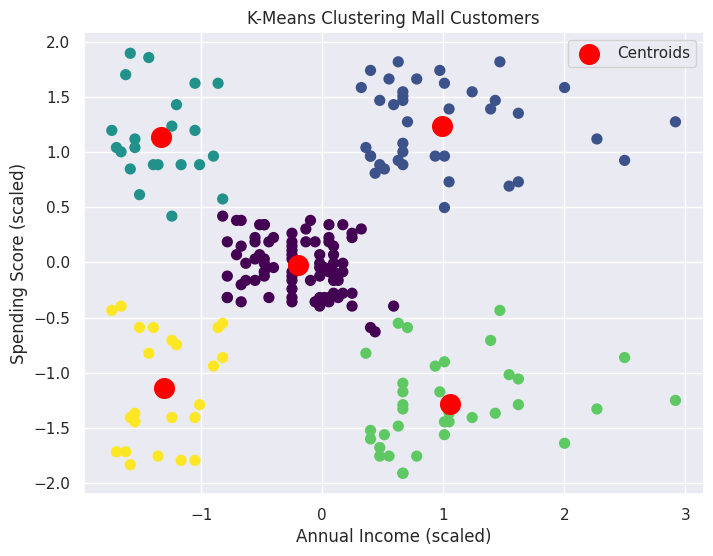

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis', s=50
)
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    s=200, c='red', label='Centroids'
)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clustering Mall Customers')
plt.legend()
plt.show()


**2. TUGAS DBSCAN**

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

In [ ]:
# Buat dataset
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Masukkan ke DataFrame agar lebih mudah ditampilkan
df = pd.DataFrame(X_scaled, columns=["Feature 1", "Feature 2"])

# Dropdown untuk memilih jumlah baris yang ditampilkan
dropdown = widgets.Dropdown(
    options=[5, 25, 50, 100, "All"],
    value=5,
    description='Tampilkan:',
)

# Fungsi update tabel saat dropdown berubah
def update_table(change):
    if dropdown.value == "All":
        display(df)
    else:
        display(df.head(dropdown.value))

# Trigger saat dropdown berubah
dropdown.observe(update_table, names='value')

# Tampilkan dropdown pertama kali
display(dropdown)
update_table(None)

Dropdown(description='Tampilkan:', options=(5, 25, 50, 100, 'All'), value=5)

,Feature 1,Feature 2
0,-0.599967,0.317573
1,0.550210,-1.425283
2,0.466498,-1.260366
3,-0.140466,-1.301730
4,-1.545573,0.568366


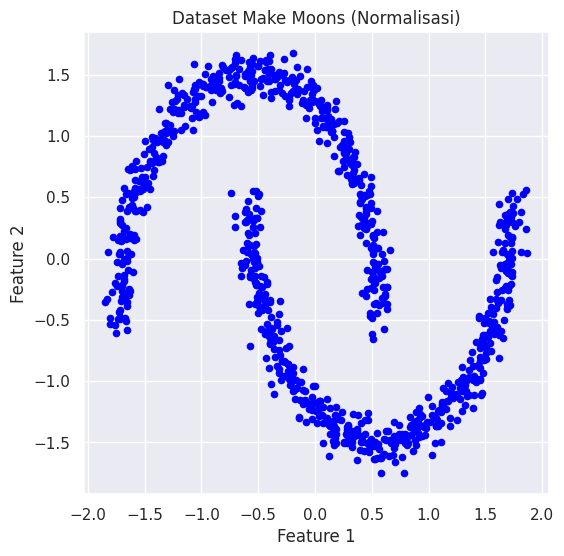

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=20, c='blue')
plt.title("Dataset Make Moons (Normalisasi)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [ ]:
from IPython.display import display, clear_output

#Definisikan slider sebelum digunakan
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)

# Masukkan ke DataFrame
df = pd.DataFrame(X_scaled, columns=["Feature 1", "Feature 2"])

# Hitung jumlah cluster & noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

row_dropdown = widgets.Dropdown(
    options=[5, 25, 50, 100, 'All'],
    value=5,
    description='Tampilkan:'
)

def update_table(change):
    clear_output(wait=True)

    print(f"Estimasi jumlah cluster: {n_clusters}")
    print(f"Estimated jumlah noise: {n_noise}")
    display(row_dropdown)

    if row_dropdown.value == 'All':
        display(df)
    else:
        display(df.head(row_dropdown.value))

display(row_dropdown)
row_dropdown.observe(update_table, names='value')
update_table(None)

Estimasi jumlah cluster: 2
Estimated jumlah noise: 0


Dropdown(description='Tampilkan:', options=(5, 25, 50, 100, 'All'), value=5)

,Feature 1,Feature 2
0,-0.599967,0.317573
1,0.550210,-1.425283
2,0.466498,-1.260366
3,-0.140466,-1.301730
4,-1.545573,0.568366


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhoutte.


In [ ]:
from sklearn import metrics

# Asumsikan labels dari DBSCAN sudah ada (labels)
# y_true = label asli jika tersedia, misal dari make_moons
# X_scaled = fitur hasil normalisasi

# Homogeneity
homogeneity = metrics.homogeneity_score(y_true, labels)

# Completeness
completeness = metrics.completeness_score(y_true, labels)

# V-measure
v_measure = metrics.v_measure_score(y_true, labels)

# Adjusted Rand Index (ARI)
ari = metrics.adjusted_rand_score(y_true, labels)

# Adjusted Mutual Information (AMI)
ami = metrics.adjusted_mutual_info_score(y_true, labels)

# Silhouette Coefficient (hanya untuk points yang bukan noise)
# Silhouette score tidak bisa menghitung jika semua label -1 atau semua dalam satu cluster
if len(set(labels)) > 1 and len(labels) - np.sum(labels == -1) > 1:
    silhouette = metrics.silhouette_score(X_scaled, labels)
else:
    silhouette = float('nan')

# Tampilkan hasil evaluasi
print("DBSCAN Evaluation")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-measure: {v_measure:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Adjusted Mutual Information (AMI): {ami:.3f}")
print(f"Silhouette Coefficient: {silhouette:.3f}")


DBSCAN Evaluation
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Adjusted Mutual Information (AMI): 1.000
Silhouette Coefficient: 0.391


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

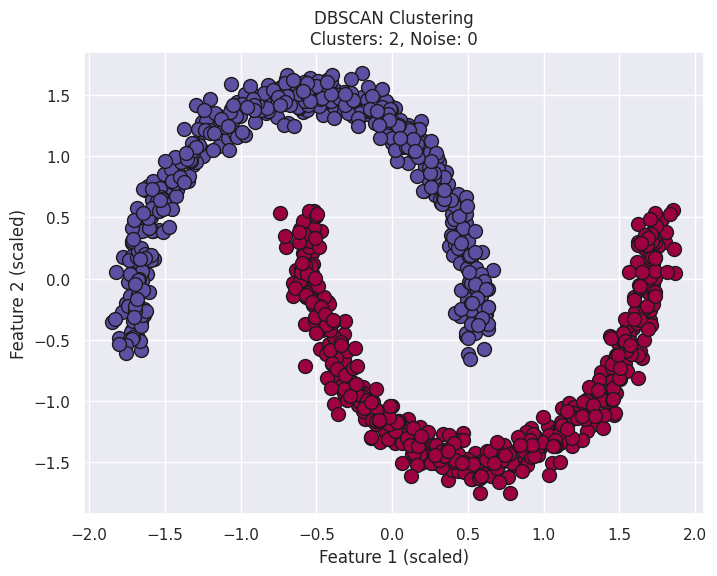

In [ ]:
# Mask untuk core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Unique labels
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f'Cluster {k}' if k != -1 else 'Noise')

    # Non-core samples
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f"DBSCAN Clustering\nClusters: {len(set(labels)) - (1 if -1 in labels else 0)}, Noise: {np.sum(labels == -1)}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

5. Lakukan eksperimen:
   - eps = 0.05, 0.1, 0.3, 0.5
   - min_samples = 3, 10, 20
   - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [ ]:
# Parameter eksperimen
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

# DataFrame untuk menyimpan hasil
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # Jalankan DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Hitung cluster & noise
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)

        # Evaluasi metrik
        homogeneity = metrics.homogeneity_score(y_true, labels)
        completeness = metrics.completeness_score(y_true, labels)
        v_measure = metrics.v_measure_score(y_true, labels)
        ari = metrics.adjusted_rand_score(y_true, labels)
        ami = metrics.adjusted_mutual_info_score(y_true, labels)
        silhouette = metrics.silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else float('nan')

        # Simpan hasil
        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "n_clusters": n_clusters,
            "n_noise": n_noise,
            "Homogeneity": round(homogeneity, 3),
            "Completeness": round(completeness, 3),
            "V-measure": round(v_measure, 3),
            "ARI": round(ari, 3),
            "AMI": round(ami, 3),
            "Silhouette": round(silhouette, 3)
        })

# Tampilkan hasil dalam tabel
results_df = pd.DataFrame(results)
results_df

,eps,min_samples,n_clusters,n_noise,Homogeneity,Completeness,V-measure,ARI,AMI,Silhouette
0,0.05,3,69,186,0.816,0.153,0.257,0.030,0.244,0.113
1,0.05,10,3,970,0.031,0.127,0.049,0.002,0.046,-0.294
2,0.05,20,0,1000,0.000,1.000,0.000,0.000,0.000,NaN
3,0.10,3,2,14,0.986,0.903,0.943,0.972,0.943,0.252
4,0.10,10,7,57,0.943,0.410,0.571,0.523,0.570,0.162
5,0.10,20,6,850,0.154,0.155,0.155,0.017,0.151,-0.360
6,0.30,3,2,0,1.000,1.000,1.000,1.000,1.000,0.391
7,0.30,10,2,0,1.000,1.000,1.000,1.000,1.000,0.391
8,0.30,20,2,0,1.000,1.000,1.000,1.000,1.000,0.391
9,0.50,3,2,0,1.000,1.000,1.000,1.000,1.000,0.391
